## Mobile Nets

#### Standard 2D convolution layer
1. Convolution layer takes as input $M$ matrices of shape $D_i \times D_i$. The input can be viewed as a 3D volume with size $D_i$ and depth $M$ (channels). 
2. Each convolution layer consists of $N$ sets of learnable weights, each of which corresponds to a learnable bias. Each set of learnable weights is also called filter and is a small volume with size $D$ and same depth as the input volume $M$, i.e. $M$ matrices of shape $D \times D$. 
3. The output activation of the convolution layer has the shape of $D_o \times D_o \times N$, where $D_o$ is computed as:
$$ D_o = \frac{D_i - D}{S} + 1 $$
4. In the equation above, $S$ is stride, which tells how many pixels the filter moves each time. The input matrices will usually be zero-padded to control the output size. 
5. The animation below shows exactly how the output of a convolution layer is computed. 

In [1]:
from IPython.display import IFrame
IFrame('https://cs231n.github.io/assets/conv-demo/index.html', width=792, height=700)

#### Depthwise separable convolution (MobileNetV1)
https://www.semanticscholar.org/paper/MobileNets%3A-Efficient-Convolutional-Neural-Networks-Howard-Zhu/3647d6d0f151dc05626449ee09cc7bce55be497e
1. Instead of using the traditional convolution layers as the building blocks, MobileNetV1 uses layers called depthwise separable convolutions.
2. Each depthwise separable convolution consists of two layers:
    1. Depthwise convolution layer: it has $M$ separate filters of shape $D \times D \times 1$, where the $m$ filter is applied to the $m$ input channel. This layer can also be thought to have 1 filter of shape $D \times D \times M$, but the output channels will not be added together. In this way, the output size is $D_o \times D_o \times M$. 
    2. Pointwise convolution layer: it has $N$ separate filters of shape $1 \times 1 \times M$. Taking the output of depthwise convolution as the input, the output of pointwise convolution also has the shape of $D_o \times D_o \times N$, just like the output of a standard convolution layer. 
3. Each filter in a convolution layer both filters and combines inputs in one step. Depthwise separable convolution splits this into two layers: depthwise convolution does filtering while pointwise convolution combines. 
4. Computational cost comparison: 
    1. Standard convolution layer (assuming stride is 1): $D_i \times D_i \times D \times D \times M \times N$
    2. Depthwise convolution layer (assuming stride is 1): $D_i \times D_i \times D \times D \times M$
    3. Pointwise convolution layer: $D \times D \times M \times N$
    4. Thus the computation cost of depthwise separable convolution is less than that of the standard convolution layer:
    $$ \frac{D_i \times D_i \times D \times D \times M + D \times D \times M \times N}{D_i \times D_i \times D \times D \times M \times N} = \frac{1}{N} + \frac{1}{D_i^2} $$

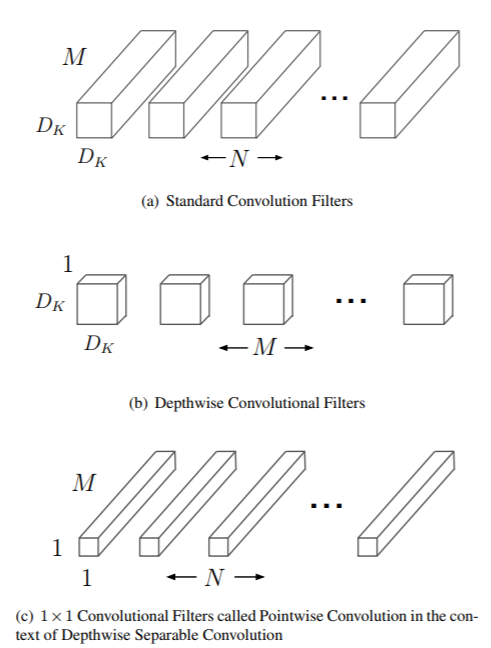

In [2]:
from IPython.display import Image
Image(filename='./1.png', width=480)

#### Inverted residual and linear bottleneck block (MobileNetV2)
https://www.semanticscholar.org/paper/MobileNetV2%3A-Inverted-Residuals-and-Linear-Sandler-Howard/dd9cfe7124c734f5a6fc90227d541d3dbcd72ba4
1. The improvement of this layer over the depthwise separable convolution is based on the following two assumptions:
    1. Although Non-linear activations (Relu) can increase representational complexity, it will result in information loss if the input doesn't have lots of channels.
    2. Activation maps are able to be encoded in low-dimensional subspaces (less channels). 
2. An expansion layer is appended to the front of the depthwise separable convolution. The expansion layer is a pointwise convolution layer with shape $1 \times 1 \times tM$, where $t$ is called expansion factor/ratio and should be larger than 1. The layer expands the low-dimensional (less channels) input activation map to a higher-dimensional (more channels) space suited to non-linear activation functions. 
3. Non-linear activation functions (Relu6) can only be applied to the high-dimensional activation maps. The last pointwise convolution layer projects the high-dimensional space back into low-dimensional space, so it can only have linear activation functions. Therefore, linear bottleneck block has three layers:
    1. Expansion layer: $1 \times 1 \times tM$, Relu6.
    2. Depthwise convolution layer: $D \times D \times tM$ (Dwise), Relu6.
    3. Pointwise convolution layer: $1 \times 1 \times M'$, Linear. 
4. A residual connection between the input and output of the block (between expansion layers) is added to aid gradient flow during back-propagation, when the initial and final activation maps of the block are of the same dimensions, which is achieved by:
    1. Depthwise convolution stride equals ($S = 1$).
    2. Input and output channels are equal ($M' = M$). 
5. The paper emphasizes that the connection is added between the expansion layers (inverted residual connection) instead of between depthwise convolution layer (residual connection), so that the connections are created between the low-dimensional activation maps.

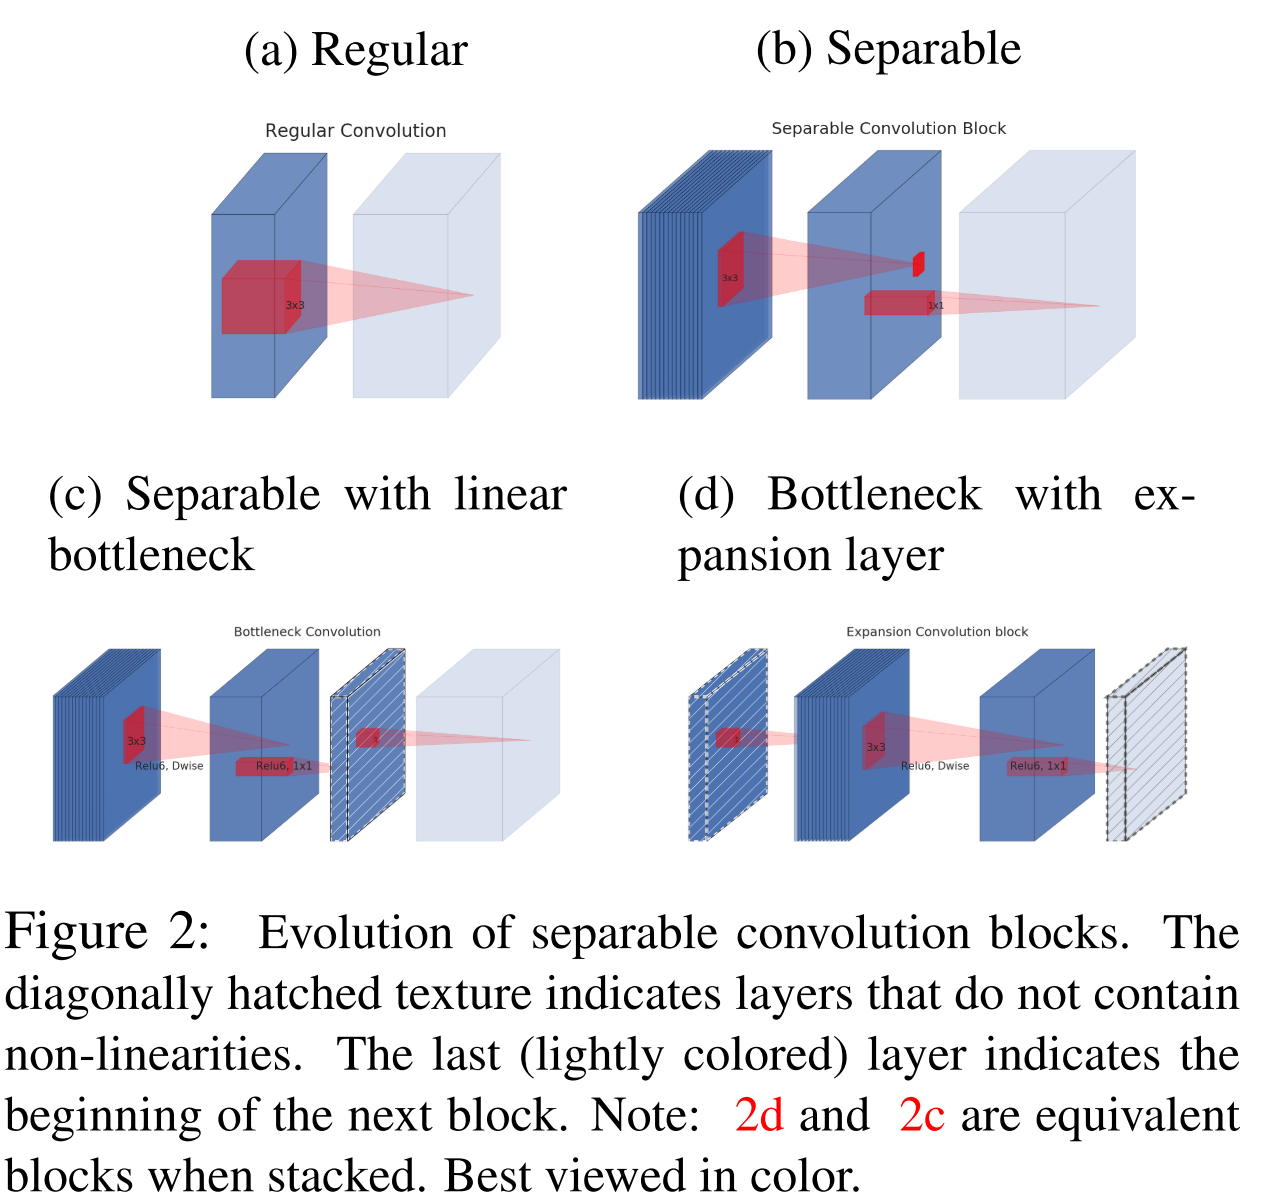

In [3]:
from IPython.display import Image
Image(filename='./2.png', width=480)

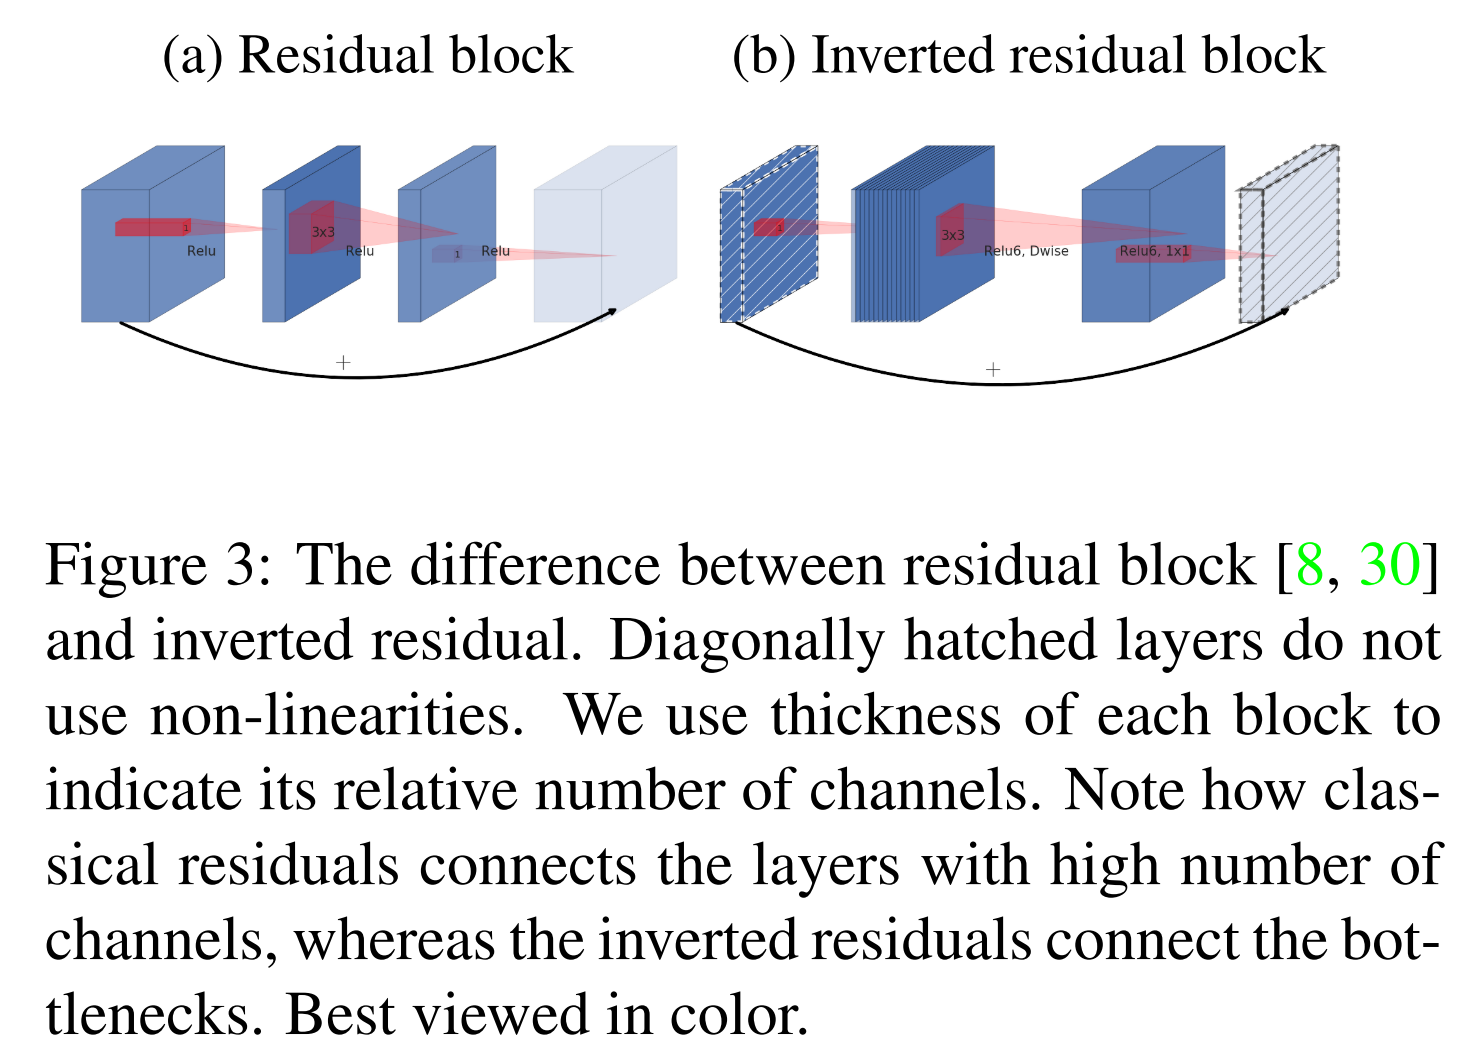

In [4]:
from IPython.display import Image
i = Image(filename='./3.png', width=480)
i 

#### Squeeze-and-Excite (MobileNetV3)
https://www.semanticscholar.org/paper/Searching-for-MobileNetV3-Howard-Sandler/83d074cc5051ade0c08d66180e4a04d2c112fa97
https://www.semanticscholar.org/paper/Squeeze-and-Excitation-Networks-Hu-Shen/df67d46e78aae0d2fccfb6212d101a342259c01b
1. MobileNetV3 uses the block that modifies the inverted residual block by adding a Squeeze-and-Excite block between the depthwise convolution layer and pointwise convolution layer. 
2. Given an input that has the shape $D_i \times D_i \times M$, Squeeze-and-Excite block in the original paper consists of three parts:
    1. Squeeze: apply global average pooling to the input, so that all information in each input channel is "squeezed" into a single channel descriptor. Each descriptor is a single value that summarizes each channel of the input. The output shape of this layer is $1 \times 1 \times M$.
    2. Excite: apply two fully connected layers to the output of the Squeeze layer. Use Relu activation function for the first layer and Sigmoid activation function for the second layer. The output of the first fully connected layer reduces the dimension by a reduction ratio $r$ and the second fully connected layer restores the dimension to be the same as the output of the Squeeze layer. 
    3. Scale: the $M$ coefficients of the output of the Excite layer are timed with $M$ channels of input of the block to form the output of the block. 

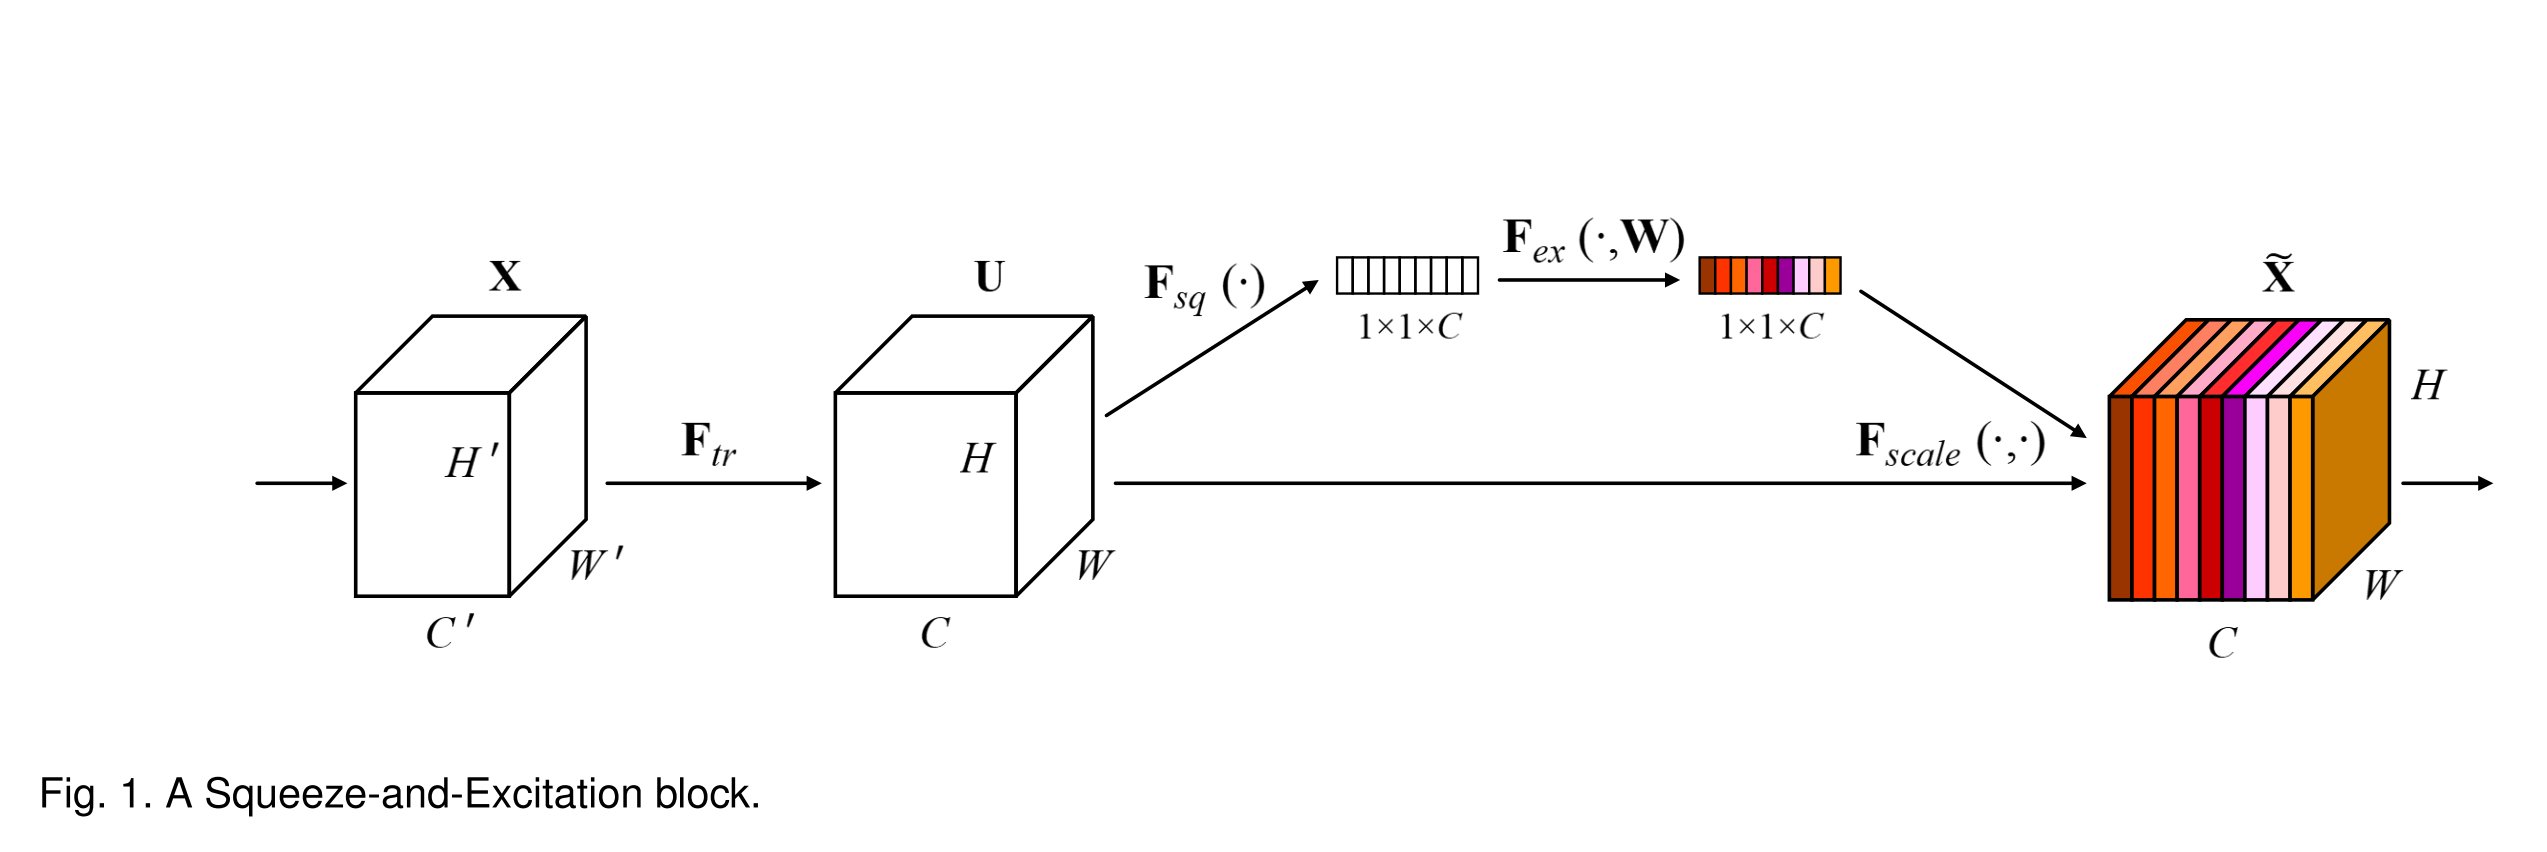

In [5]:
from IPython.display import Image
Image(filename='./4.png', width=960)

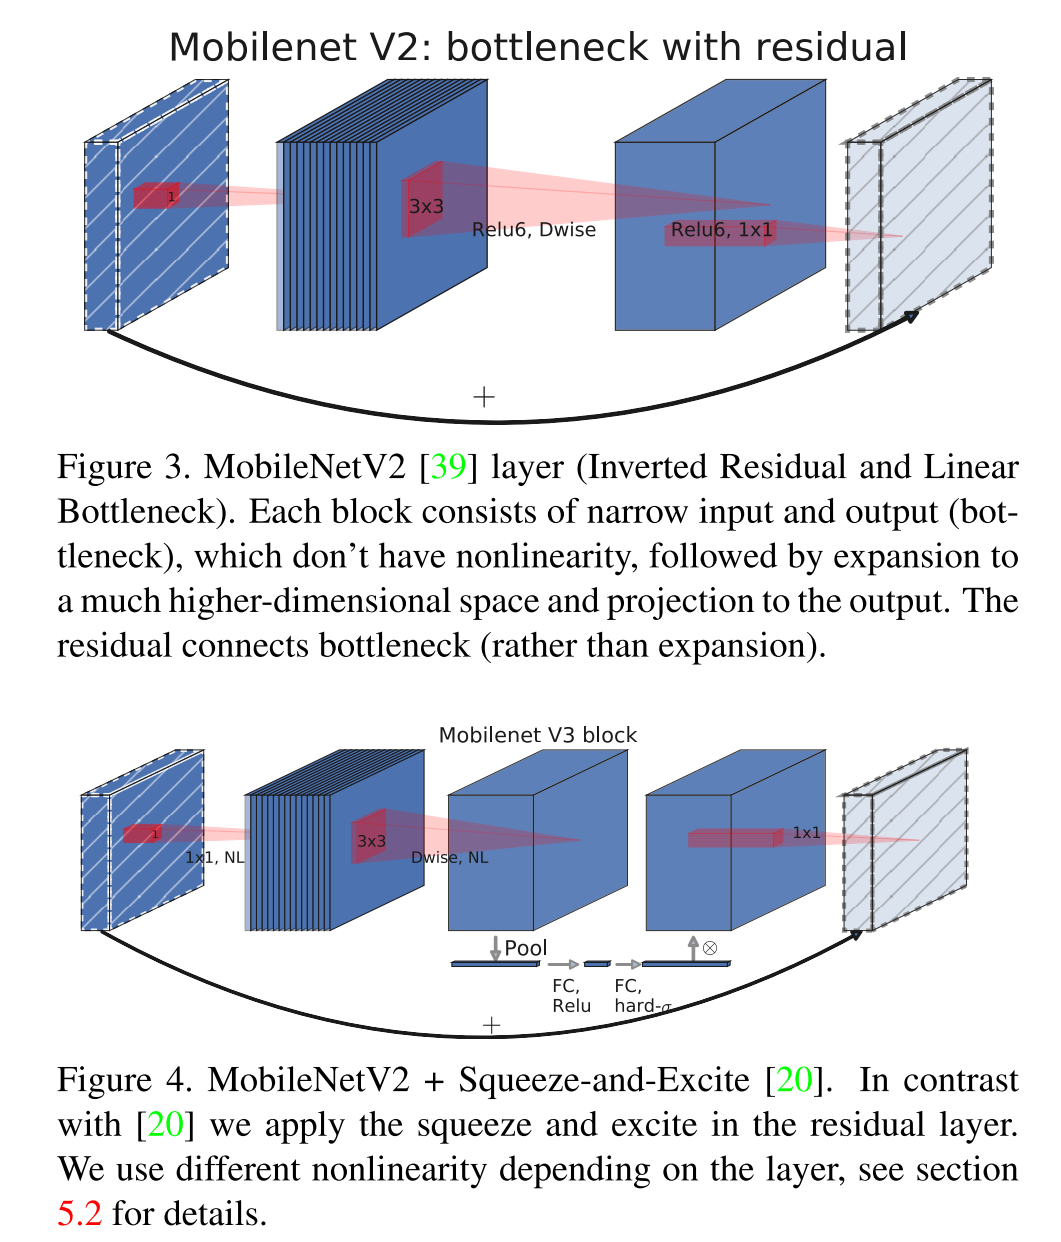

In [6]:
from IPython.display import Image
Image(filename='./5.png', width=480)